In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import string
import sklearn
import re
import nltk
pd.set_option('display.max_colwidth', 100)

In [104]:
df_1 = pd.read_csv('yelp_ratings.csv')
df = df_1[:2000]
df.head(3)

,text,stars,sentiment
0,Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge u...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly Cardenas Salon! I'm always a fan of a great blowo...,5.0,1
2,"I have to say that this office really has it together, they are so organized and friendly! Dr. ...",5.0,1


In [105]:
df.isna().sum()

text         0
stars        0
sentiment    0
dtype: int64

In [106]:
stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

In [107]:
def clean_text(text):
    no_punct = "".join([char for char in text if char not in string.punctuation])
    tokens = re.findall('\w+', no_punct)
    text = [ps.stem(word.lower()) for word in tokens if word not in stopwords]
    return text
    
df['clean_text'] = df['text'].apply(lambda x : clean_text(x))

<ipython-input-107-bba71614bee3>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_text'] = df['text'].apply(lambda x : clean_text(x))


In [108]:
df['len_text'] = df['text'].apply(lambda x: len(x)-x.count(" "))
df['punct%'] = df['text'].apply(lambda x: ((sum([1 for char in x if char in string.punctuation]))/(len(x)-x.count(' '))*100))

<ipython-input-108-8ec42faa3787>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['len_text'] = df['text'].apply(lambda x: len(x)-x.count(" "))
<ipython-input-108-8ec42faa3787>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['punct%'] = df['text'].apply(lambda x: ((sum([1 for char in x if char in string.punctuation]))/(len(x)-x.count(' '))*100))


In [124]:
df[df['sentiment']==0]

,text,stars,sentiment,clean_text,len_text,punct%
0,Total bill for this horrible service? Over $8Gs. These crooks actually had the nerve to charge u...,1.0,0,"[total, bill, horribl, servic, over, 8g, these, crook, actual, nerv, charg, us, 69, 3, pill, i, ...",166,4.216867
4,"Today was my second out of three sessions I had paid for. Although my first session went well, I...",1.0,0,"[today, second, three, session, i, paid, although, first, session, went, well, i, could, tell, m...",2837,3.278111
6,This place has gone down hill. Clearly they have cut back on staff and food quality\n\nMany of ...,1.0,0,"[thi, place, gone, hill, clearli, cut, back, staff, food, qualiti, mani, review, written, menu, ...",304,3.618421
7,"I was really looking forward to visiting after having some of their beers. The ""Man O'War"" quick...",2.0,0,"[i, realli, look, forward, visit, beer, the, man, owar, quickli, becam, favorit, dipa, rusulka, ...",1160,3.706897
9,"Walked in around 4 on a Friday afternoon, we sat at a table just off the bar and walked out afte...",1.0,0,"[walk, around, 4, friday, afternoon, sat, tabl, bar, walk, 5, min, dont, even, think, realiz, wa...",348,4.310345
...,...,...,...,...,...,...
1984,Went there last night but they were closed. Not sure why because it's suppose to be 24/7. It was...,2.0,0,"[went, last, night, close, not, sure, suppos, 247, it, late, night, though, 2am, mayb, reset, so...",521,4.414587
1988,Customer service is crap. No personality .1 and done for me. So many other Italian eateries in t...,1.0,0,"[custom, servic, crap, no, person, 1, done, so, mani, italian, eateri, area]",87,5.747126
1994,There's really nothing special or noteworthy about the Village Idiot. Except that you must be on...,2.0,0,"[there, realli, noth, special, noteworthi, villag, idiot, except, must, one, keep, come, sin, re...",332,3.915663
1995,"The beer selection here disappointed me, very laid back bar that can be a great hang out for fri...",2.0,0,"[the, beer, select, disappoint, laid, back, bar, great, hang, friend, weekend, the, drink, fairl...",313,2.875399


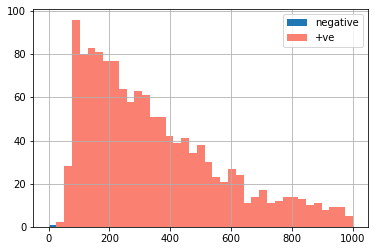

In [125]:
df[df['sentiment']==0]['len_text'].hist(bins=np.linspace(0,1000,40), label="negative")
df[df['sentiment']==1]['len_text'].hist(bins=np.linspace(0,1000,40), label="+ve", color='salmon')
plt.legend()

<AxesSubplot:>

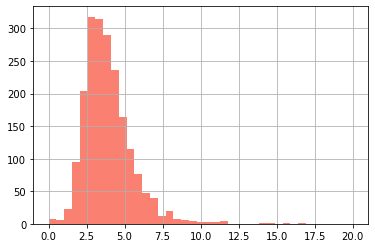

In [118]:
df['punct%'].hist(bins=np.linspace(0,20,40), color='salmon')

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('sentiment', axis=1), df.sentiment, test_size=0.21)

In [9]:
X_train[:4]

,text,stars,clean_text,len_text,punct%
182,"Food taste Ok. I like the pasta selection. However, there is No seafood choices at all. If you a...",2.0,"[food, tast, ok, i, like, pasta, select, howev, no, seafood, choic, if, look, seafood, skip, place]",112,5.357143
975,This restaurant was really good & we all had a wonderful dining experience with our large group....,4.0,"[thi, restaur, realli, good, wonder, dine, experi, larg, group, excel, attent, servic, fresh, fl...",212,4.716981
492,I went to Itech Customs for just a quick quote on my iphone6s screen/ front camera crack. iTech ...,5.0,"[i, went, itech, custom, quick, quot, iphone6, screen, front, camera, crack, itech, fix, 75, spr...",272,4.411765
981,the ice cream is great but the owner is very rude. everytime i go in there she always have somet...,2.0,"[ice, cream, great, owner, rude, everytim, go, alway, someth, rude, say, ice, cream, get, 5, sta...",135,2.222222


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer= clean_text)
X_train_fit = count_vect.fit(X_train.text)

X_train_vect = X_train_fit.transform(X_train.text)
X_test_vect = X_train_fit.transform(X_test.text)

In [11]:
X_train_df = pd.DataFrame(X_train_vect.toarray(), columns=count_vect.get_feature_names())
X_test_df = pd.DataFrame(X_test_vect.toarray(), columns=count_vect.get_feature_names())

In [12]:
X_train_df[:5]

,0,04,0915,0920,0922,1,10,100,1000,10000,...,ziti,zone,zoo,zucchini,zy,à,ça,étant,étoil,ête
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X_train = pd.concat([X_train_df, X_train[['len_text', 'punct%', 'stars']].reset_index(drop=1)], axis=1)
X_test = pd.concat([X_test_df, X_test[['len_text', 'punct%', 'stars']].reset_index(drop=1)], axis=1)

In [14]:
X_train.head(3)

,0,04,0915,0920,0922,1,10,100,1000,10000,...,zucchini,zy,à,ça,étant,étoil,ête,len_text,punct%,stars
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,112,5.357143,2.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,212,4.716981,4.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,272,4.411765,5.0


In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
np.random.seed(32)
clf = GradientBoostingClassifier()

grid = {'n_estimators':[100,50,150],
       'max_depth':[None, 7, 15],
       'learning_rate':[0.1, 0.9]}
rs_clf = RandomizedSearchCV(estimator = clf, param_distributions = grid, n_iter=10, cv=5, verbose=2)

In [16]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..learning_rate=0.9, max_depth=15, n_estimators=150; total time=  24.0s
[CV] END ..learning_rate=0.9, max_depth=15, n_estimators=150; total time=  22.3s
[CV] END ..learning_rate=0.9, max_depth=15, n_estimators=150; total time=  23.6s
[CV] END ..learning_rate=0.9, max_depth=15, n_estimators=150; total time=  15.9s
[CV] END ..learning_rate=0.9, max_depth=15, n_estimators=150; total time=  19.8s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  23.6s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  24.4s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  26.6s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  26.6s
[CV] END learning_rate=0.1, max_depth=None, n_estimators=100; total time=  24.6s
[CV] END ....learning_rate=0.9, max_depth=7, n_estimators=50; total time=   6.6s
[CV] END ....learning_rate=0.9, max_depth=7, n_e

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.9],
                                        'max_depth': [None, 7, 15],
                                        'n_estimators': [100, 50, 150]},
                   verbose=2)

In [17]:
clf.get_params()
rs_clf.best_params_

{'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.9}

In [18]:
y_preds = rs_clf.predict(X_test)

In [19]:
rs_clf.score(X_test, y_test)

1.0

In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
precision_score(y_test, y_preds), recall_score(y_test, y_preds), f1_score(y_test, y_preds), cross_val_score(clf, pd.concat([X_train, X_test], axis=0), pd.concat([y_train, y_test], axis=0), cv=5, scoring= 'accuracy')

(1.0, 1.0, 1.0, array([1., 1., 1., 1., 1.]))

In [21]:
accuracy_score(y_test, y_preds)

1.0

In [51]:
from sklearn.metrics import confusion_matrix
conf=confusion_matrix(y_test, y_preds)

In [54]:
import sklearn
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test)

AttributeError: type object 'ConfusionMatrixDisplay' has no attribute 'from_estimator'

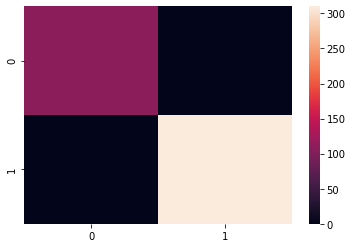

In [59]:
import seaborn as sns
sns.heatmap(conf);


In [63]:
pd.DataFrame(rs_clf.cv_results_).sort_values(by='mean_test_score', ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,21.124830,3.017288,0.116605,0.007610,150,15,0.9,"{'n_estimators': 150, 'max_depth': 15, 'learning_rate': 0.9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,25.161185,1.211009,0.114202,0.004445,100,None,0.1,"{'n_estimators': 100, 'max_depth': None, 'learning_rate': 0.1}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,6.323863,0.234228,0.112604,0.005314,50,7,0.9,"{'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,14.054006,1.868176,0.116202,0.007222,100,15,0.9,"{'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,23.032592,3.311908,0.117002,0.006325,50,None,0.9,"{'n_estimators': 50, 'max_depth': None, 'learning_rate': 0.9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('sentiment', axis=1), df.sentiment, test_size=0.21)

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_count = tfidf_vect.fit(X_train.text)

X_train_vect = X_count.transform(X_train.text)
X_test_vect = X_count.transform(X_test.text)

In [93]:
X_train_df =pd.DataFrame(X_train_vect.toarray(), columns=tfidf_vect.get_feature_names())
X_test_df = pd.DataFrame(X_test_vect.toarray(), columns = tfidf_vect.get_feature_names())

In [97]:
X_train = pd.concat([X_train_df, X_train[['stars','len_text','punct%']].reset_index(drop=True)], axis=1)
X_test = pd.concat([X_test_df, X_test[['stars','len_text','punct%']].reset_index(drop=True)], axis=1)

In [98]:
clf = GradientBoostingClassifier()
grid = {'n_estimators':[150,100,50],
     'max_depth':[7,15],
     'learning_rate':[0.1,0.9,1]}

rs_clf = RandomizedSearchCV(estimator=clf, param_distributions=grid, cv=5,verbose=2, n_iter=10)

In [99]:
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=  13.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=  12.9s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=  10.5s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=   9.8s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=100; total time=  10.3s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=150; total time=  17.8s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=150; total time=  17.9s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=150; total time=  14.1s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=150; total time=  14.3s
[CV] END .....learning_rate=1, max_depth=7, n_estimators=150; total time=  14.6s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   6.6s
[CV] END ....learning_rate=0.1, max_depth=7, n_e

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.1, 0.9, 1],
                                        'max_depth': [7, 15],
                                        'n_estimators': [150, 100, 50]},
                   verbose=2)

In [101]:
pd.DataFrame(rs_clf.cv_results_).sort_values('mean_test_score', ascending=False)[:5]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,11.300829,1.379959,0.120401,0.006648,100,7,1,"{'n_estimators': 100, 'max_depth': 7, 'learning_rate': 1}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,15.718370,1.741601,0.121002,0.013161,150,7,1,"{'n_estimators': 150, 'max_depth': 7, 'learning_rate': 1}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,6.525326,0.169903,0.113599,0.004750,50,7,0.1,"{'n_estimators': 50, 'max_depth': 7, 'learning_rate': 0.1}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,16.310657,1.893845,0.121600,0.008546,100,15,0.1,"{'n_estimators': 100, 'max_depth': 15, 'learning_rate': 0.1}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,9.253153,1.428929,0.122000,0.008293,50,15,0.9,"{'n_estimators': 50, 'max_depth': 15, 'learning_rate': 0.9}",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [103]:
sorted(zip(rs_clf.feature_importances, X_train.columns))[:5]

AttributeError: 'RandomizedSearchCV' object has no attribute 'feature_importances'